----

# **Clustring Results Visualization Different Techniques**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

### **Import Libraries**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### **Load the Datast**

In [49]:
df = pd.read_csv('/content/pokemon.csv')

### **First 5 rows of dataset**

In [50]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### **Drop Catagorical Variables**

- As we will not be able to plot these variables.

In [51]:
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2','Generation', 'Legendary']
df = df[types].drop(columns=drop_cols)

- This code filters a DataFrame `df` to keep only the rows where the 'Type 1' column is either 'Grass', 'Fire', or 'Water'. It then drops the columns 'Type 1', 'Type 2', 'Generation', and 'Legendary' from the filtered DataFrame.

In [52]:
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


### **Defining KMeans Cluster**

In [53]:
kmeans = KMeans(n_clusters=3, random_state=3)
df['cluster'] = kmeans.fit_predict(df[['Attack','Defense']])

- This code initializes a KMeans clustering algorithm with 3 clusters and a random state of 3. It fits the model to the 'Attack' and 'Defense' columns of the DataFrame `df`, predicting cluster assignments, which are then stored in a new column called 'cluster'.

#### **Defining Centroids**

In [54]:
centroids = kmeans.cluster_centers_
con_x = [i[0] for i in centroids]
con_y = [i[1] for i in centroids]

This code retrieves the centroids (center points) of the clusters from the KMeans model. It then creates two lists:

- `con_x`, which contains the x-coordinates (first feature) of the centroids.
- `con_y`, which contains the y-coordinates (second feature) of the centroids.

These lists can be used for plotting or further analysis.

In [55]:
df['con_x'] = df['cluster'].map({0:con_x[0], 1:con_x[1], 2:con_x[2]})
df['con_y'] = df['cluster'].map({0:con_y[0], 1:con_y[1], 2:con_y[2]})

This code adds two new columns to the DataFrame `df`:

- `con_x`: Maps the cluster labels (0, 1, 2) to their corresponding x-coordinates from the centroids.
- `con_y`: Maps the cluster labels (0, 1, 2) to their corresponding y-coordinates from the centroids.

As a result, each row in `df` will now have the x and y coordinates of the centroid associated with its cluster.

In [56]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
df['c'] = df['cluster'].map({0:colors[0], 1:colors[1], 2:colors[2]})

This code creates a new column called `color` in the DataFrame `df`. It maps the cluster labels (0, 1, 2) to specific colors from the `colors` list:

- Cluster 0 is assigned the color `#1f77b4`
- Cluster 1 is assigned the color `#ff7f0e`
- Cluster 2 is assigned the color `#2ca02c`

This allows for easy visualization of clusters using their respective colors.

### **Create a scatter Plot for attack and Defence Data Points**

<Axes: xlabel='Attack', ylabel='Defense'>

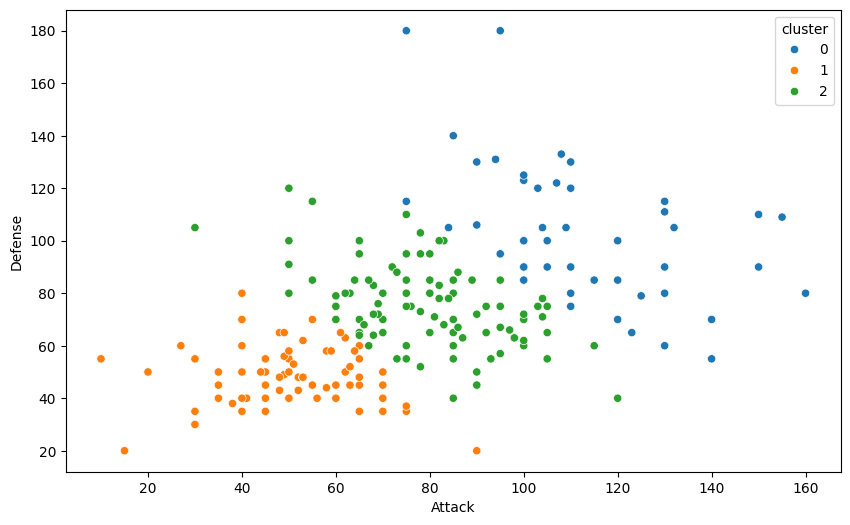

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Attack', y='Defense', hue='cluster', palette=colors)

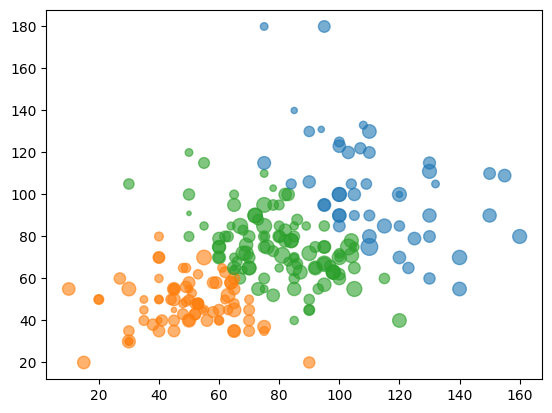

In [60]:
# Let's create a scatterplot by highlighting datapoints for each cluster
plt.scatter(df['Attack'], df['Defense'], c=df['c'], alpha=0.6, s=df['Speed'])
plt.show()

### **Visualization of Pokémon Clusters Using KMeans Clustering**

- This code generates a scatter plot to visualize Pokémon data based on 'Attack' and 'Defense' values, utilizing KMeans clustering to categorize Pokémon into different clusters. It marks cluster centroids and adds a legend for clarity, enhancing the understanding of the distribution and grouping of Pokémon attributes.

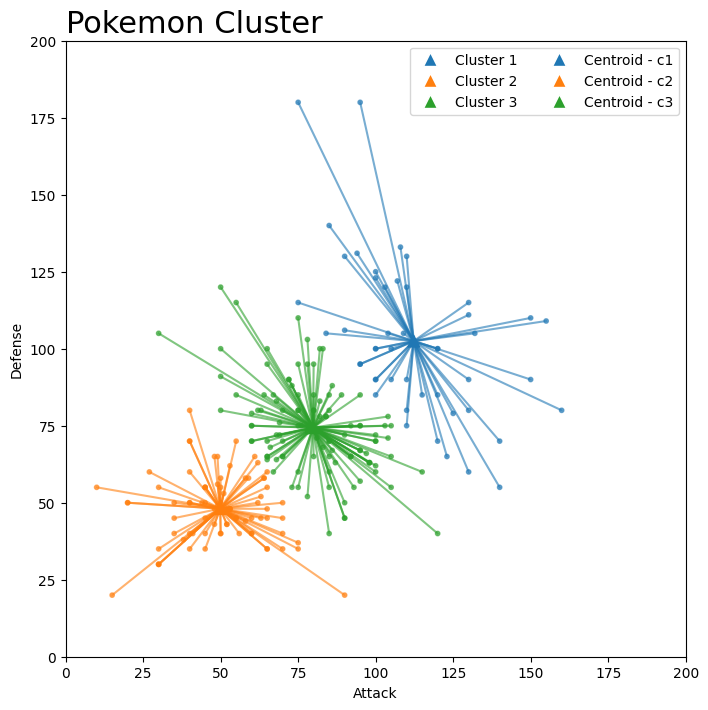

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)
plt.scatter(con_x, con_y, marker='^', c=colors, s=70)

for idx, val in df.iterrows():
    x = [val.Attack, val.con_x]
    y = [val.Defense, val.con_y]
    plt.plot(x, y, c=val.c, alpha=0.6)

## Centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - c{}'.format(i + 1),
                    markerfacecolor=color, markersize=10) for i, color in enumerate(colors)]

## Legend
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Cluster {}'.format(i + 1),
                           markerfacecolor=color, markersize=10) for i, color in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - c{}'.format(i + 1),
                               markerfacecolor=color, markersize=10) for i, color in enumerate(colors)])

plt.legend(handles=legend_elements, loc='upper right', ncol=2)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.title('Pokemon Cluster', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()